<a href="https://colab.research.google.com/github/ElvysPascoal/An-lise-de-Dados-com-Pandas/blob/main/20230913__Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados

### Imports

In [ ]:
!pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 85.0 MB/s eta 0:00:00


In [1]:
import pandas            as pd
import numpy             as np
#import polars            as pl
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/MyDrive/dados gerais/20230915_dados_enem.xlsx')

### Load Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 76 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NU_INSCRICAO            1048575 non-null  int64  
 1   NU_ANO                  1048575 non-null  int64  
 2   TP_FAIXA_ETARIA         1048575 non-null  int64  
 3   TP_SEXO                 1048575 non-null  object 
 4   TP_ESTADO_CIVIL         1048575 non-null  int64  
 5   TP_COR_RACA             1048575 non-null  int64  
 6   TP_NACIONALIDADE        1048575 non-null  int64  
 7   TP_ST_CONCLUSAO         1048575 non-null  int64  
 8   TP_ANO_CONCLUIU         1048575 non-null  int64  
 9   TP_ESCOLA               1048575 non-null  int64  
 10  TP_ENSINO               444720 non-null   float64
 11  IN_TREINEIRO            1048575 non-null  int64  
 12  CO_MUNICIPIO_ESC        306248 non-null   float64
 13  NO_MUNICIPIO_ESC        306248 non-null   object 
 14  CO

In [7]:
df.shape

(1048575, 76)

No Pandas podemos carregar dados de diferentes formatos. Os principais são :
* CSV
* Excel
* SQL

Usando PySpark um formato muito utilizado é o parquet. Veremos este ponto mais adiante.

De igual modo podemos escrever os arquivos em diferentes formatos (output).

Na prática o formato de dados que iremos trabalhar vai depender muito da origem dos dados, da estrutura da empresa que estaremos trabalhando, etc.


Para saber mais clique [aqui](https://medium.com/analytics-vidhya/python-pandas-data-input-and-output-297725432339).

### Microdados ENEM

Grupos de variáveis
* Dados do participante
* Dados da escola
* Dados do local de aplicação da prova
* Dados da prova objetiva
* Dados da redação
* Dados do questionário socioeconômico

#### Desafio :Elaborar um gráfico de pareto com os estados e as maiores notas.

### Inspeção de Dados

Hipótese levantadas

*   Padrões espaciais afetam o desempenho escolar?
*   Características municipais afetam o desempenho escolar?
*   Renda familiar pode afetar a nota dos alunos?
*   Há diferença de desempenho entre escolar públicas e privadas?
*   Qual matéria tem maior nota naquela região?



In [8]:
# leitura das 5 primeiras linhas
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [9]:
df.head(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
5,210052391248,2021,10,F,1,3,1,1,9,1,...,A,A,A,A,A,A,B,A,A,B
6,210052615524,2021,9,F,0,3,1,1,6,1,...,B,A,A,B,B,A,C,A,A,B
7,210054368957,2021,4,F,1,1,1,1,1,1,...,B,A,A,C,B,A,D,B,B,B
8,210053417016,2021,8,F,1,3,1,2,0,2,...,B,A,A,B,A,A,B,A,A,B
9,210051128744,2021,4,F,1,3,1,2,0,2,...,B,A,B,C,B,A,C,A,A,B


In [10]:
# leitura das 5 últimas linhas
df.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1048570,210053707471,2021,8,F,1,1,1,1,6,1,...,A,A,A,B,A,A,C,A,B,B
1048571,210051469891,2021,11,F,1,3,1,1,10,1,...,B,A,A,C,B,A,C,A,B,B
1048572,210051157856,2021,3,F,1,3,1,2,0,2,...,B,A,A,B,A,A,D,B,B,B
1048573,210051126563,2021,3,F,1,1,1,1,1,1,...,B,A,A,B,A,A,B,B,B,B
1048574,210052876324,2021,2,F,1,3,1,3,0,1,...,A,A,A,B,A,A,D,A,A,B


In [11]:
df.tail(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1048565,210051491474,2021,6,M,1,1,1,1,3,1,...,B,A,A,D,B,A,C,A,B,B
1048566,210051615646,2021,3,F,1,1,1,1,1,1,...,B,B,B,E,B,B,A,B,E,B
1048567,210053265859,2021,4,F,1,1,1,1,1,1,...,A,A,A,B,A,A,C,A,A,B
1048568,210051202225,2021,10,F,1,2,1,1,5,1,...,A,A,A,B,A,A,C,A,A,B
1048569,210054265313,2021,3,M,1,3,1,1,1,1,...,A,A,A,C,A,A,C,A,B,B
1048570,210053707471,2021,8,F,1,1,1,1,6,1,...,A,A,A,B,A,A,C,A,B,B
1048571,210051469891,2021,11,F,1,3,1,1,10,1,...,B,A,A,C,B,A,C,A,B,B
1048572,210051157856,2021,3,F,1,3,1,2,0,2,...,B,A,A,B,A,A,D,B,B,B
1048573,210051126563,2021,3,F,1,1,1,1,1,1,...,B,A,A,B,A,A,B,B,B,B
1048574,210052876324,2021,2,F,1,3,1,3,0,1,...,A,A,A,B,A,A,D,A,A,B


Nota: os comandos `df.head()` e `df.tail()` são úteis para inspecionar e compreender o dataset.

In [12]:
# quantidade de linhas x quantidade de colunas
# o resultado é uma tupla - podemos verificar com a função type()
df.shape

(1048575, 76)

In [13]:
# Sumário do Dataset
# número de valores não nulos, dtype de cada coluna, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 76 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NU_INSCRICAO            1048575 non-null  int64  
 1   NU_ANO                  1048575 non-null  int64  
 2   TP_FAIXA_ETARIA         1048575 non-null  int64  
 3   TP_SEXO                 1048575 non-null  object 
 4   TP_ESTADO_CIVIL         1048575 non-null  int64  
 5   TP_COR_RACA             1048575 non-null  int64  
 6   TP_NACIONALIDADE        1048575 non-null  int64  
 7   TP_ST_CONCLUSAO         1048575 non-null  int64  
 8   TP_ANO_CONCLUIU         1048575 non-null  int64  
 9   TP_ESCOLA               1048575 non-null  int64  
 10  TP_ENSINO               444720 non-null   float64
 11  IN_TREINEIRO            1048575 non-null  int64  
 12  CO_MUNICIPIO_ESC        306248 non-null   float64
 13  NO_MUNICIPIO_ESC        306248 non-null   object 
 14  CO

In [14]:
# verifica missing (dados ausentes)
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending = False)

TP_LOCALIZACAO_ESC        70.793887
CO_UF_ESC                 70.793887
TP_SIT_FUNC_ESC           70.793887
TP_DEPENDENCIA_ADM_ESC    70.793887
SG_UF_ESC                 70.793887
                            ...    
TP_PRESENCA_LC             0.000000
TP_PRESENCA_MT             0.000000
NU_ANO                     0.000000
TP_LINGUA                  0.000000
NU_INSCRICAO               0.000000
Length: 76, dtype: float64

In [15]:
# nome das colunas
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [16]:
# Sumário estatístico dos dados
# 25%: Primeiro Quartil
# 50%: Segundo Quartil (Mediana)
# 75%: Terceiro Quartil
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,1048575.0,2.100527e+11,9.976345e+05,2.100510e+11,2.100519e+11,2.100527e+11,2.100536e+11,2.100545e+11
NU_ANO,1048575.0,2.021000e+03,0.000000e+00,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03
TP_FAIXA_ETARIA,1048575.0,4.523558e+00,3.324281e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,2.000000e+01
TP_ESTADO_CIVIL,1048575.0,1.025347e+00,3.538211e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_COR_RACA,1048575.0,2.079099e+00,1.019893e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
TP_NACIONALIDADE,1048575.0,1.029036e+00,2.082760e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_ST_CONCLUSAO,1048575.0,1.667531e+00,6.750250e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
TP_ANO_CONCLUIU,1048575.0,1.750789e+00,3.451026e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.500000e+01
TP_ESCOLA,1048575.0,1.498868e+00,6.046153e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
TP_ENSINO,444720.0,1.006364e+00,7.951776e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [17]:
df.index

RangeIndex(start=0, stop=1048575, step=1)

In [18]:
# Quantidade de valores únicos por coluna
df.nunique().sort_values(ascending = True)

NU_ANO                   1
Q025                     2
Q021                     2
Q020                     2
Q018                     2
                    ...   
TX_RESPOSTAS_MT     780918
TX_RESPOSTAS_CN     780975
TX_RESPOSTAS_CH     817535
TX_RESPOSTAS_LC     818589
NU_INSCRICAO       1048575
Length: 76, dtype: int64

In [19]:
type(df)

pandas.core.frame.DataFrame

### Selecionando colunas

In [20]:
# seleciona uma coluna
df.TP_ESCOLA

0          1
1          1
2          1
3          2
4          2
          ..
1048570    1
1048571    1
1048572    2
1048573    1
1048574    1
Name: TP_ESCOLA, Length: 1048575, dtype: int64

In [21]:
# distribuição de frequência
df.TP_ESCOLA.value_counts()

1    586062
2    401926
3     60587
Name: TP_ESCOLA, dtype: int64

In [22]:
# seleciona uma coluna
df['TP_ESCOLA']

0          1
1          1
2          1
3          2
4          2
          ..
1048570    1
1048571    1
1048572    2
1048573    1
1048574    1
Name: TP_ESCOLA, Length: 1048575, dtype: int64

In [23]:
# seleciona uma coluna
# .loc[] : seleciona colunas pelo label
# sintaxe: df.loc[linhas:colunas]
df.loc[:, 'TP_SEXO']

0          F
1          M
2          F
3          M
4          F
          ..
1048570    F
1048571    F
1048572    F
1048573    F
1048574    F
Name: TP_SEXO, Length: 1048575, dtype: object

In [24]:
# seleciona múltiplas
df[['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,1
1,M,1
2,F,1
3,M,2
4,F,2
...,...,...
1048570,F,1
1048571,F,1
1048572,F,2
1048573,F,1


In [25]:
# seleciona múltiplas colunas com .loc
df.loc[:, ['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,1
1,M,1
2,F,1
3,M,2
4,F,2
...,...,...
1048570,F,1
1048571,F,1
1048572,F,2
1048573,F,1


In [26]:
# .iloc[] : seleciona colunas pela posição
# sintaxe: df.iloc[linhas:colunas]
df.iloc[:, 0]

0          210053865474
1          210052384164
2          210052589243
3          210052128335
4          210051353021
               ...     
1048570    210053707471
1048571    210051469891
1048572    210051157856
1048573    210051126563
1048574    210052876324
Name: NU_INSCRICAO, Length: 1048575, dtype: int64

In [27]:
# exemplo de seleção com .iloc
df.iloc[0:5, 0]

0    210053865474
1    210052384164
2    210052589243
3    210052128335
4    210051353021
Name: NU_INSCRICAO, dtype: int64

Com a função `.select_dtypes()` podemos selecionar colunas de acordo com seu dtype (int, float, bool, etc.). Em várias situações isso pode ser útil, dentre outras coisas para aplicarmos rotinas específicas de acordo com o dtype ou ainda separar as colunas em qualitativas e quantitivas.

In [28]:
# seleciona colunas numéricas
df.select_dtypes(include = [int, float])

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
0,210053865474,2021,5,1,1,1,1,3,1,NaN,...,NaN,1,1.0,140.0,120.0,120.0,180.0,200.0,760.0,3.0
1,210052384164,2021,12,1,1,1,1,11,1,NaN,...,461.5,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,3.0
2,210052589243,2021,13,3,1,1,1,15,1,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,210052128335,2021,3,1,3,1,2,0,2,1.0,...,659.5,0,1.0,120.0,180.0,120.0,200.0,160.0,780.0,6.0
4,210051353021,2021,2,1,3,1,2,0,2,1.0,...,582.6,1,1.0,120.0,140.0,160.0,180.0,180.0,780.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,210053707471,2021,8,1,1,1,1,6,1,NaN,...,NaN,1,1.0,120.0,120.0,100.0,100.0,0.0,440.0,2.0
1048571,210051469891,2021,11,1,3,1,1,10,1,NaN,...,501.6,1,1.0,140.0,180.0,120.0,160.0,120.0,720.0,2.0
1048572,210051157856,2021,3,1,3,1,2,0,2,1.0,...,428.2,1,1.0,100.0,100.0,100.0,140.0,140.0,580.0,7.0
1048573,210051126563,2021,3,1,1,1,1,1,1,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [29]:
# outra forma de fazer:
df.select_dtypes(exclude = object)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
0,210053865474,2021,5,1,1,1,1,3,1,NaN,...,NaN,1,1.0,140.0,120.0,120.0,180.0,200.0,760.0,3.0
1,210052384164,2021,12,1,1,1,1,11,1,NaN,...,461.5,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,3.0
2,210052589243,2021,13,3,1,1,1,15,1,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,210052128335,2021,3,1,3,1,2,0,2,1.0,...,659.5,0,1.0,120.0,180.0,120.0,200.0,160.0,780.0,6.0
4,210051353021,2021,2,1,3,1,2,0,2,1.0,...,582.6,1,1.0,120.0,140.0,160.0,180.0,180.0,780.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,210053707471,2021,8,1,1,1,1,6,1,NaN,...,NaN,1,1.0,120.0,120.0,100.0,100.0,0.0,440.0,2.0
1048571,210051469891,2021,11,1,3,1,1,10,1,NaN,...,501.6,1,1.0,140.0,180.0,120.0,160.0,120.0,720.0,2.0
1048572,210051157856,2021,3,1,3,1,2,0,2,1.0,...,428.2,1,1.0,100.0,100.0,100.0,140.0,140.0,580.0,7.0
1048573,210051126563,2021,3,1,1,1,1,1,1,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [30]:
# seleciona colunas str
# df.select_dtypes(exclude = [int, float])
df.select_dtypes(include = object)

,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,F,NaN,NaN,Nova Lima,MG,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,NaN,...,A,A,A,B,A,A,B,A,B,B
1,M,NaN,NaN,Maceió,AL,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,...,A,A,A,B,A,A,C,A,A,A
2,F,NaN,NaN,Ferraz de Vasconcelos,SP,NaN,NaN,NaN,NaN,NaN,...,B,A,A,B,A,A,C,B,B,B
3,M,Crato,CE,Crato,CE,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,...,A,A,A,B,A,A,B,A,B,B
4,F,Redenção,CE,Acarape,CE,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,...,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,F,NaN,NaN,Naviraí,MS,NaN,BBEECEEAEBBABAEADEDBCDAEBABDECABCCADDACDBBBCA,99999EAADBACADDEEEDBADBAADCBDDBABCADCEAAACCCDE...,NaN,NaN,...,A,A,A,B,A,A,C,A,B,B
1048571,F,NaN,NaN,São Paulo,SP,BACCDEDECABDCEBCDBEDBEADBCEAEDADACDBCCBDBDBCA,BDEECAEABACBEAEBAAAECDEBBCADBCAAAEECBBEDCECAB,99999AAECDCDBDCADBDCDEBDCEDCAADBACEBEDEABCADAD...,DCEEBBDECEBADEEACDDABECAEADCBEBCCDCEBDCCDEBAD,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,...,B,A,A,C,B,A,C,A,B,B
1048572,F,Osasco,SP,Osasco,SP,CDCDEDECEDBDDCBEDECECCDADCBCCBDBCDCBBDBCEECDC,CBADADEACDACBABDACBCAEAEACB.ABECAEEBDACDAEDCB,99999CAAAEBDCACCAEBABCEADEDDCCBADCEADCACEDBDAC...,BADCBCBCCCEAACDBDCBCBAACEDADBBBBEDCCCAEAAEBCB,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,...,B,A,A,B,A,A,D,B,B,B
1048573,F,NaN,NaN,Maceió,AL,NaN,NaN,NaN,NaN,NaN,...,B,A,A,B,A,A,B,B,B,B


In [31]:
cat_cols = df.select_dtypes(include = object).columns.tolist()
num_cols = df.select_dtypes(include = [int, float]).columns.tolist()

### Filtro

Existe diferença na nota de matemática entre alunos de escola pública e privada?

In [32]:
# alunos de colégio público
df.query('TP_ESCOLA == 2').NU_NOTA_MT.mean()

507.68789283688477

In [33]:
# alunos de colégio privado
df.query('TP_ESCOLA == 3').NU_NOTA_MT.mean()

616.3112716213648

In [34]:
# alunos de colégio privado
df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median])

mean      616.311272
median    625.100000
Name: NU_NOTA_MT, dtype: float64

In [35]:
# alunos de colégio pública
df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median])

mean      507.687893
median    487.700000
Name: NU_NOTA_MT, dtype: float64

In [36]:
# 1 condição
df.query('TP_SEXO == "M"').sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
291727,210051019582,2021,3,M,1,3,1,2,0,2,...,B,A,A,C,B,A,E,B,A,B
838699,210051706712,2021,1,M,1,3,1,3,0,1,...,A,A,A,B,A,A,C,A,B,B
618473,210053401623,2021,9,M,1,5,1,1,2,1,...,A,A,A,A,A,A,B,A,A,A
346191,210051859092,2021,8,M,1,3,1,1,6,1,...,A,A,A,B,A,A,C,A,A,B
825724,210054288786,2021,11,M,1,3,1,1,10,1,...,A,A,A,B,A,B,B,A,A,B


In [37]:
# validando a nossa consulta
# .unique(): retorna os valores únicos de uma determinada coluna
df.query('TP_SEXO == "M"')['TP_SEXO'].unique()

array(['M'], dtype=object)

Agora vamos retornar um subset com os alunos do sexo Masculino que sejam treineiros. Neste caso usaremos o operador & (`AND`).

In [38]:
df.query('(TP_SEXO == "M") & (IN_TREINEIRO == 1)')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
294,210053158140,2021,1,M,1,3,1,3,0,1,...,B,A,A,D,B,A,C,A,B,B
388,210051690116,2021,2,M,1,1,1,3,0,1,...,B,A,B,C,B,A,B,B,A,B
434,210052230914,2021,2,M,1,3,1,3,0,1,...,B,A,A,B,B,A,E,A,A,B
580,210053707047,2021,1,M,1,1,1,3,0,1,...,A,A,A,B,A,A,C,A,A,B
828,210051742270,2021,1,M,1,1,1,3,0,1,...,B,A,A,B,A,A,B,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048362,210051406369,2021,2,M,1,3,1,3,0,1,...,B,A,A,B,B,A,C,A,B,B
1048394,210051099071,2021,1,M,1,3,1,3,0,1,...,B,A,A,C,A,B,D,A,B,B
1048434,210053627914,2021,2,M,1,3,1,3,0,1,...,B,A,A,C,A,A,C,A,B,B
1048532,210051950014,2021,1,M,1,1,1,3,0,1,...,B,A,A,C,A,A,E,A,B,B


In [39]:
df.query("(TP_SEXO == 'M') & (IN_TREINEIRO == 1)").sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
410919,210051066699,2021,2,M,1,3,1,3,0,1,...,A,A,A,C,A,A,A,A,A,B
597960,210051270360,2021,2,M,1,1,1,3,0,1,...,B,A,A,B,A,A,B,A,A,B
484346,210054379923,2021,2,M,1,4,1,3,0,1,...,A,A,A,C,A,A,E,A,A,B
716552,210051873095,2021,1,M,1,1,1,3,0,1,...,B,B,B,D,A,B,D,B,B,B
707326,210051773395,2021,2,M,1,3,1,3,0,1,...,A,A,A,B,A,A,D,A,A,B


Se o objetivo fosse retornar os alunos do sexo masculino ou que foram treineiros, poderíamos usar o operador | (`OR`).

In [40]:
df.query("(TP_SEXO == 'M') | (IN_TREINEIRO == 1)").sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
346108,210051317907,2021,11,M,1,5,1,1,7,1,...,A,A,A,A,A,A,B,A,A,A
29376,210053339478,2021,2,M,1,1,1,2,0,2,...,A,A,A,B,A,A,D,A,B,B
789599,210053547994,2021,4,M,1,3,1,1,0,1,...,B,A,A,C,B,A,E,A,A,B
752791,210052846425,2021,12,M,1,1,1,1,0,1,...,B,A,A,A,A,A,C,A,B,B
851249,210052376737,2021,3,M,1,1,1,2,0,3,...,B,A,B,C,A,B,D,B,B,B


Outra sintaxe:

In [41]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [42]:
# cria uma máscara booleana
mask = df.TP_SEXO == 'M'
mask

0          False
1           True
2          False
3           True
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Name: TP_SEXO, Length: 1048575, dtype: bool

In [43]:
df[mask]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
12,210053193408,2021,11,M,2,3,1,1,11,1,...,A,A,A,B,A,A,C,A,B,B
13,210051549956,2021,5,M,1,2,1,1,3,1,...,A,A,A,C,B,A,A,A,A,B
17,210051519039,2021,8,M,1,3,1,1,6,1,...,A,A,A,B,A,A,C,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048556,210051248050,2021,7,M,0,0,1,1,4,1,...,A,A,A,B,A,A,C,A,B,B
1048560,210052134671,2021,5,M,1,3,2,1,0,1,...,A,A,A,D,A,A,E,A,A,B
1048564,210051894197,2021,11,M,2,3,1,1,0,1,...,A,A,A,B,A,A,C,A,B,B
1048565,210051491474,2021,6,M,1,1,1,1,3,1,...,B,A,A,D,B,A,C,A,B,B


In [44]:
df[df.TP_SEXO == "M"].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
386842,210052865781,2021,8,M,1,2,1,1,3,1,...,A,A,A,B,A,A,D,A,B,B
1005755,210051366879,2021,2,M,1,1,1,2,0,2,...,A,A,B,D,A,A,D,A,B,B
920020,210051432286,2021,6,M,1,3,1,1,0,1,...,A,A,A,B,A,A,B,A,A,A
598788,210051932696,2021,2,M,1,1,1,2,0,2,...,B,A,A,B,A,A,D,A,A,A
906350,210051681578,2021,2,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [45]:
df.loc[df.TP_SEXO == "M"].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
484748,210053156964,2021,6,M,1,1,1,1,2,1,...,A,A,A,B,A,A,D,A,B,B
555627,210051880547,2021,4,M,1,3,1,1,2,1,...,A,A,A,B,A,A,C,B,B,B
278800,210052848291,2021,5,M,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,A,B
431399,210052586633,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A
635788,210053291717,2021,1,M,1,1,1,3,0,1,...,B,B,B,D,A,A,D,B,B,B


In [46]:
df[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
740171,210052566814,2021,1,M,1,3,1,3,0,1,...,B,A,B,B,A,B,E,A,D,B
909669,210054206519,2021,1,M,1,1,1,3,0,1,...,B,A,A,B,A,B,B,B,B,B
340016,210051855493,2021,2,M,1,2,1,3,0,1,...,A,A,A,B,B,A,C,A,B,B
426283,210054194986,2021,2,M,1,3,1,3,0,1,...,B,A,A,C,A,A,E,A,B,B
627198,210051736298,2021,2,M,1,2,1,3,0,1,...,A,A,A,B,B,A,D,A,B,B


In [47]:
df.loc[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
354742,210052264689,2021,2,M,1,2,1,3,0,1,...,B,A,A,B,A,A,C,A,B,B
163727,210054159380,2021,1,M,1,2,1,3,0,1,...,A,A,B,C,A,A,E,A,A,B
635237,210051987719,2021,2,M,1,1,1,3,0,1,...,B,A,B,C,B,B,D,A,C,B
967329,210053929751,2021,1,M,1,1,1,3,0,1,...,B,A,B,E,B,A,E,A,C,B
1035823,210052588548,2021,1,M,1,1,1,3,0,1,...,A,A,B,E,B,A,D,B,D,B


Uma forma alternativa:

In [48]:
condition_1 = df.TP_SEXO == "M"
condition_2 = df.IN_TREINEIRO == 1
df.loc[(condition_1) & (condition_2)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
488011,210051463560,2021,1,M,1,3,1,3,0,1,...,A,A,A,B,A,A,D,A,B,B
748690,210051718184,2021,3,M,1,3,1,3,0,1,...,A,A,A,B,A,A,C,A,B,B
190502,210051590937,2021,1,M,1,3,1,3,0,1,...,B,A,B,B,A,A,C,A,B,B
690795,210053110187,2021,1,M,1,3,1,3,0,1,...,A,A,A,B,A,A,C,A,A,A
1009048,210053321438,2021,1,M,1,2,1,3,0,1,...,B,A,B,C,B,B,C,A,B,B


Negação

In [49]:
df[df.NO_MUNICIPIO_PROVA.isin(['Itabuna', 'Salvador'])].NO_MUNICIPIO_PROVA.unique()

array(['Salvador', 'Itabuna'], dtype=object)

Podemos usar o perador `~` para negar uma determinada condição:

In [50]:
df[~(df.NO_MUNICIPIO_PROVA.isin(['Salvador']))]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,210053707471,2021,8,F,1,1,1,1,6,1,...,A,A,A,B,A,A,C,A,B,B
1048571,210051469891,2021,11,F,1,3,1,1,10,1,...,B,A,A,C,B,A,C,A,B,B
1048572,210051157856,2021,3,F,1,3,1,2,0,2,...,B,A,A,B,A,A,D,B,B,B
1048573,210051126563,2021,3,F,1,1,1,1,1,1,...,B,A,A,B,A,A,B,B,B,B


### Visualização de Dados

In [51]:
provas = df.columns[(df.columns.str.contains('NOTA')) & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_INSCRICAO']

Utilizando uma sintaxe simples da biblioteca Pandas conseguimos gerar análises gráficas rapidamente. Podemos fazer os seguintes tipos de gráficos:

* Barras
* Pizza
* Linha
* Histograma
* Boxplot
* Densidade
* Área
* Dispersão


Para obter mais detalhes acesse a documentação [aqui](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

Text(0.5, 1.0, 'Tipo escola dos participantes no ENEM 2021')

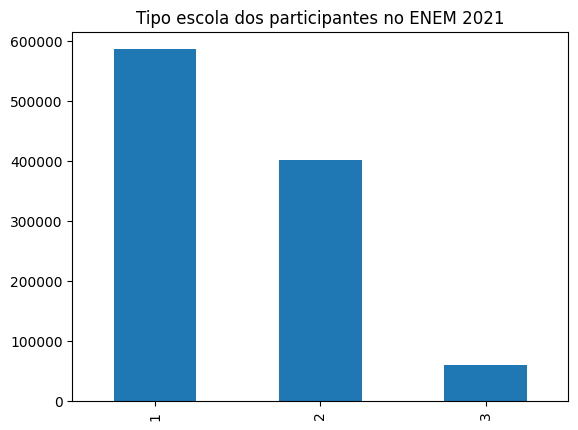

In [52]:
df.TP_ESCOLA.value_counts().plot(kind = 'bar')
plt.title('Tipo escola dos participantes no ENEM 2021')

<Axes: >

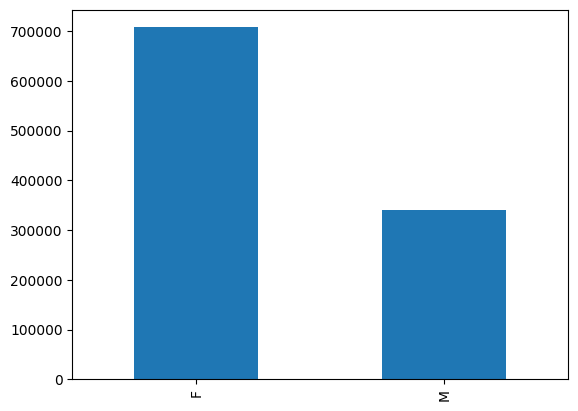

In [53]:
df.TP_SEXO.value_counts().plot(kind = 'bar')

Melhorando um pouco o plot:

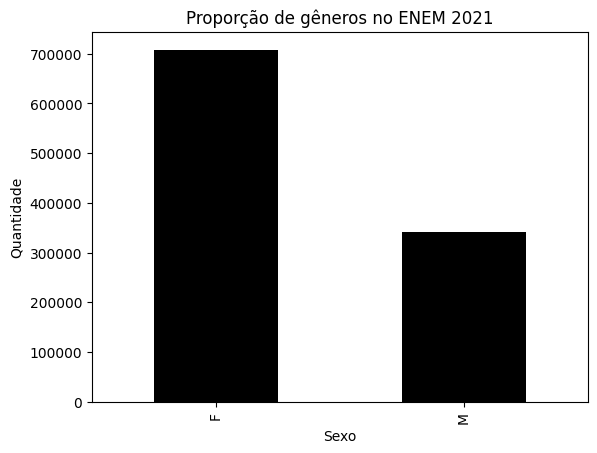

In [54]:
# gráfico de barras
df.TP_SEXO.value_counts().plot(kind = 'bar', color = 'black')
# título
plt.title('Proporção de gêneros no ENEM 2021')
# label do eixo x
plt.xlabel('Sexo')
# label do eixo y
plt.ylabel('Quantidade')

plt.show()
#plt.xlabel('Sexo');plt.ylabel('Quantidade');plt.show()

In [55]:
#df.NO_MUNICIPIO_PROVA\
#.value_counts()\
#.reset_index()

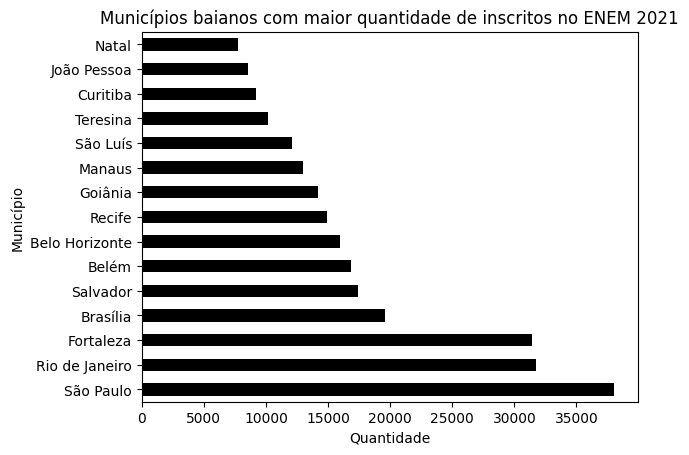

In [56]:
(
    df.NO_MUNICIPIO_PROVA
    .value_counts()
    .reset_index()
    .rename(columns = {'index' : 'Município', 'NO_MUNICIPIO_PROVA': 'Quantidade'})
    .nlargest(n = 15, columns = 'Quantidade')
    .set_index('Município')
    .plot(
        kind = 'barh',
        color = 'black',
        legend = False,
        xlabel = 'Quantidade',
        title = 'Municípios baianos com maior quantidade de inscritos no ENEM 2021'
    )
);

Gráfico de pizza

* Proporção entre os gêneros

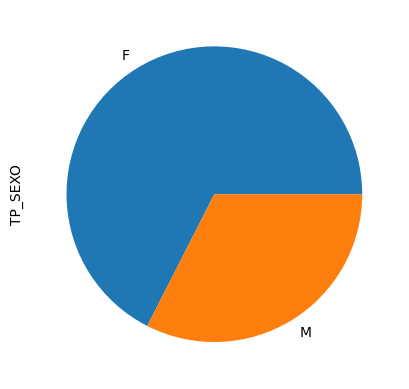

In [57]:
df.TP_SEXO.value_counts().plot(kind = 'pie');

* Tipo escola

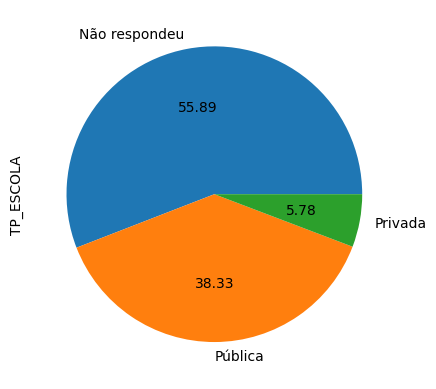

In [58]:
(
    df.TP_ESCOLA.map({1:'Não respondeu', 2:'Pública', 3:'Privada'})
    .value_counts()
    .plot(kind = 'pie',
          legend = False,
          autopct = '%.2f'
         )
);

Gráfico de dispersão das notas de Matemática e Ciências da Natureza:

<Axes: xlabel='NU_NOTA_MT', ylabel='NU_NOTA_CN'>

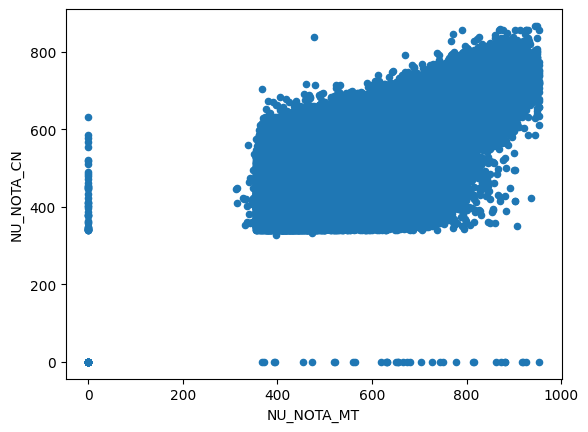

In [59]:
df.plot(kind = 'scatter', x = 'NU_NOTA_MT', y = 'NU_NOTA_CN')

Histograma

<Axes: ylabel='Frequency'>

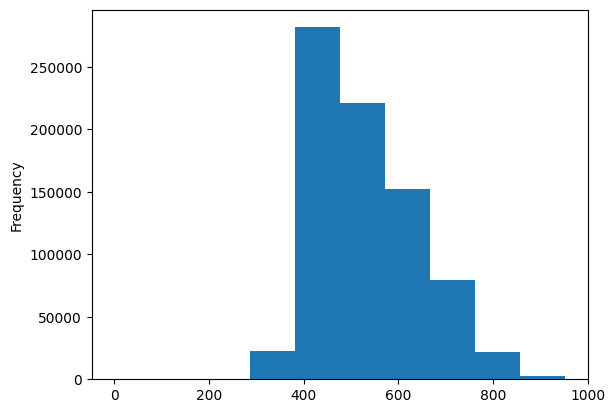

In [60]:
df.NU_NOTA_MT.plot(kind = 'hist')

Boxplot

<Axes: >

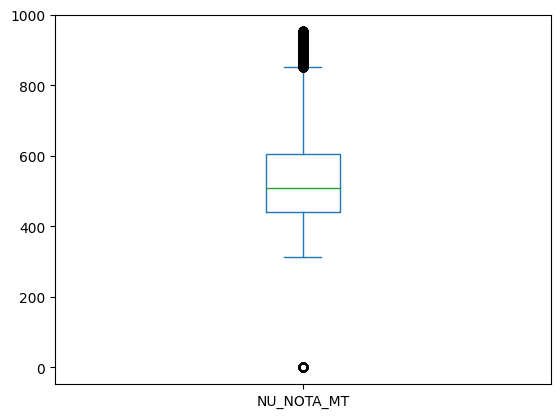

In [61]:
df.NU_NOTA_MT.plot(kind = 'box')

<Axes: >

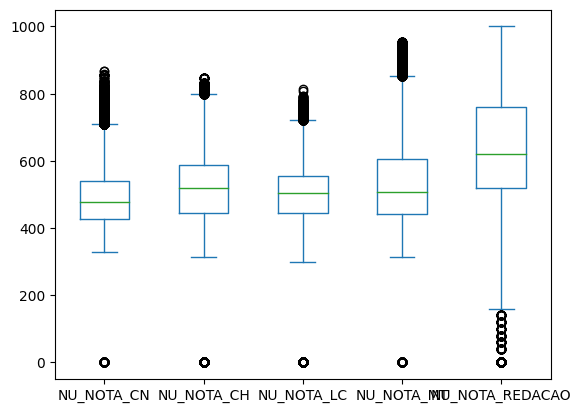

In [62]:
df[provas].plot(kind = 'box')

Kde (densidade)

<Axes: ylabel='Density'>

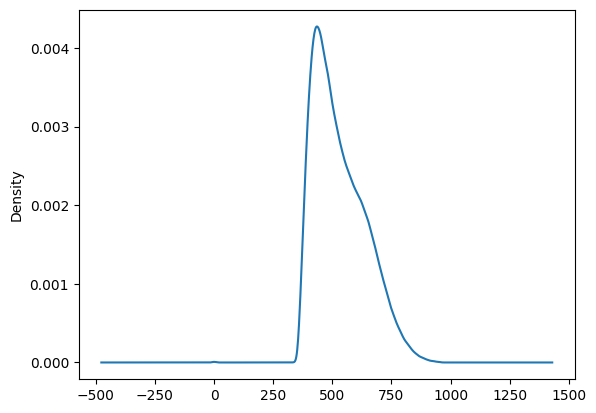

In [63]:
df.NU_NOTA_MT.plot(kind = 'kde')

Gráfico de linhas

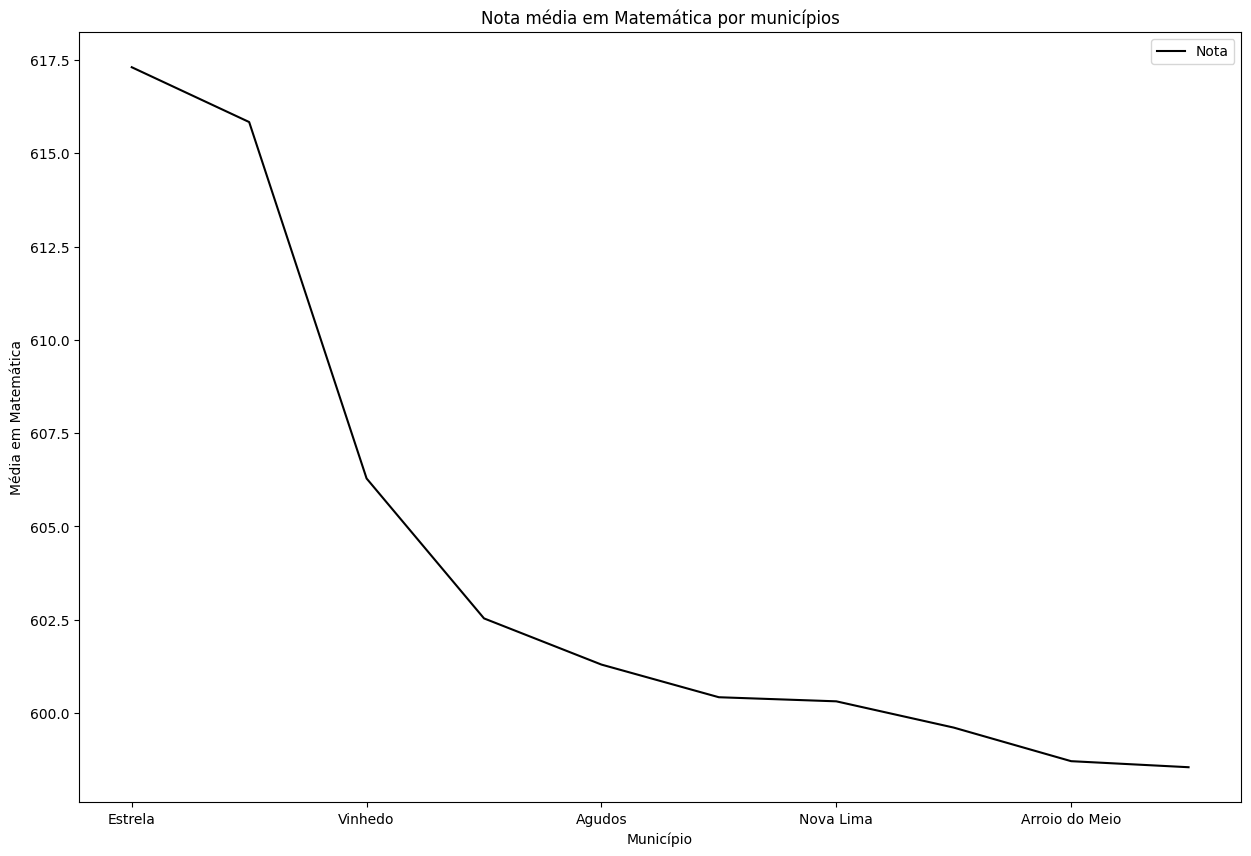

In [64]:
(
    df
    .groupby(by = ['NO_MUNICIPIO_PROVA'])
    .agg({'NU_NOTA_MT': np.mean})
    .reset_index()
    .rename(columns = {'NU_NOTA_MT' : 'Nota', 'NO_MUNICIPIO_PROVA': 'Município'})
    .nlargest(n = 10, columns = 'Nota')
    .plot(
        x       = 'Município',
        y       = 'Nota',
        figsize = (15, 10),
        color   = 'k',
        ylabel  = 'Média em Matemática',
        title   = 'Nota média em Matemática por municípios',
        #ylim    = [520, 545]

    )

);

### Ordenação

Em alguns casos precisamos ordenar os dados por alguma coluna ou conjunto de colunas. No Pandas podemos utilizar a função `.sort_values()`.

In [65]:
provas = df.columns[(df.columns.str.contains('NOTA')) & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_INSCRICAO']

In [66]:
df_subset = df[idCandidato+provas].sample(n = 10, random_state = 9999)

In [67]:
# ordena o dataset em ordem decrescente
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
392980,210053791731,633.6,699.9,633.4,729.3,880.0
582791,210053504451,625.1,666.4,682.5,695.2,900.0
87274,210053145238,481.3,524.7,534.9,680.8,540.0
397213,210051433852,480.5,605.5,570.7,614.2,700.0
160271,210052249513,477.3,480.1,521.1,590.0,780.0
193254,210053488035,586.5,693.8,564.0,588.7,840.0
684459,210052966486,432.6,393.8,435.9,450.6,0.0
401351,210053777224,406.1,401.3,480.0,442.4,500.0
387264,210053117386,500.2,473.7,480.1,424.0,880.0
813214,210052188677,NaN,406.4,384.4,NaN,420.0


In [68]:
# ordena o dataset em ordem crescente
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = True)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
387264,210053117386,500.2,473.7,480.1,424.0,880.0
401351,210053777224,406.1,401.3,480.0,442.4,500.0
684459,210052966486,432.6,393.8,435.9,450.6,0.0
193254,210053488035,586.5,693.8,564.0,588.7,840.0
160271,210052249513,477.3,480.1,521.1,590.0,780.0
397213,210051433852,480.5,605.5,570.7,614.2,700.0
87274,210053145238,481.3,524.7,534.9,680.8,540.0
582791,210053504451,625.1,666.4,682.5,695.2,900.0
392980,210053791731,633.6,699.9,633.4,729.3,880.0
813214,210052188677,NaN,406.4,384.4,NaN,420.0


Podemos definir onde queremos inserir os valores ausentes com `na_position`.

In [69]:
df_subset.sort_values(by = ['NU_NOTA_MT'], na_position = 'first', ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
813214,210052188677,NaN,406.4,384.4,NaN,420.0
392980,210053791731,633.6,699.9,633.4,729.3,880.0
582791,210053504451,625.1,666.4,682.5,695.2,900.0
87274,210053145238,481.3,524.7,534.9,680.8,540.0
397213,210051433852,480.5,605.5,570.7,614.2,700.0
160271,210052249513,477.3,480.1,521.1,590.0,780.0
193254,210053488035,586.5,693.8,564.0,588.7,840.0
684459,210052966486,432.6,393.8,435.9,450.6,0.0
401351,210053777224,406.1,401.3,480.0,442.4,500.0
387264,210053117386,500.2,473.7,480.1,424.0,880.0


In [70]:
df_subset.sort_values(by = ['NU_NOTA_MT'], na_position = 'last', ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
392980,210053791731,633.6,699.9,633.4,729.3,880.0
582791,210053504451,625.1,666.4,682.5,695.2,900.0
87274,210053145238,481.3,524.7,534.9,680.8,540.0
397213,210051433852,480.5,605.5,570.7,614.2,700.0
160271,210052249513,477.3,480.1,521.1,590.0,780.0
193254,210053488035,586.5,693.8,564.0,588.7,840.0
684459,210052966486,432.6,393.8,435.9,450.6,0.0
401351,210053777224,406.1,401.3,480.0,442.4,500.0
387264,210053117386,500.2,473.7,480.1,424.0,880.0
813214,210052188677,NaN,406.4,384.4,NaN,420.0


Podemos efetuar a ordenação por mais de uma coluna:

In [71]:
df_subset.sort_values(by = ['NU_NOTA_MT', 'NU_NOTA_CN'], ascending = [False, False])

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
392980,210053791731,633.6,699.9,633.4,729.3,880.0
582791,210053504451,625.1,666.4,682.5,695.2,900.0
87274,210053145238,481.3,524.7,534.9,680.8,540.0
397213,210051433852,480.5,605.5,570.7,614.2,700.0
160271,210052249513,477.3,480.1,521.1,590.0,780.0
193254,210053488035,586.5,693.8,564.0,588.7,840.0
684459,210052966486,432.6,393.8,435.9,450.6,0.0
401351,210053777224,406.1,401.3,480.0,442.4,500.0
387264,210053117386,500.2,473.7,480.1,424.0,880.0
813214,210052188677,NaN,406.4,384.4,NaN,420.0


Podemos ainda aplicar a função `.sort_values()` para uma Series, neste caso não precisamos especificar o argumento `by`:

In [72]:
type(df.NU_NOTA_MT)

pandas.core.series.Series

In [73]:
df_subset.NU_NOTA_MT.sort_values()

387264    424.0
401351    442.4
684459    450.6
193254    588.7
160271    590.0
397213    614.2
87274     680.8
582791    695.2
392980    729.3
813214      NaN
Name: NU_NOTA_MT, dtype: float64

In [74]:
df_subset.NU_NOTA_MT.sort_values(ascending = True, na_position = 'first')

813214      NaN
387264    424.0
401351    442.4
684459    450.6
193254    588.7
160271    590.0
397213    614.2
87274     680.8
582791    695.2
392980    729.3
Name: NU_NOTA_MT, dtype: float64

Em alguns casos estamos interessados em criar um ranking. Vamos filtra a base para os candidatos que fizeram a prova em Salvador e posteriormente criar um top 10 na prova de Matemática.

In [75]:
df_subset = df.query('NO_MUNICIPIO_PROVA == "Salvador"')[idCandidato+provas]

In [76]:
df_subset

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
14,210054173438,NaN,NaN,NaN,NaN,NaN
39,210053741476,453.4,438.3,503.4,379.5,600.0
54,210054171092,NaN,NaN,NaN,NaN,NaN
101,210053702687,603.3,622.5,571.7,729.2,860.0
119,210054087112,414.6,420.5,368.6,399.4,480.0
...,...,...,...,...,...,...
1048254,210051642970,NaN,NaN,NaN,NaN,NaN
1048276,210053343811,501.9,598.6,522.4,568.7,600.0
1048280,210052793911,NaN,NaN,NaN,NaN,NaN
1048362,210051406369,474.7,658.4,593.7,616.6,880.0


In [77]:
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = False).iloc[:11, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
494841,210053271130,751.0,720.4,661.1,948.5,900.0
51070,210053763665,754.6,698.1,685.8,944.1,920.0
936151,210052520408,741.7,705.8,655.4,929.8,740.0
953456,210054118249,667.7,681.3,652.5,928.8,860.0
636291,210051245410,717.1,774.0,669.3,926.8,920.0
890422,210053627867,780.2,779.2,667.0,925.1,940.0
287605,210051627711,774.2,762.5,683.5,920.8,940.0
149104,210052892545,771.1,718.4,662.7,916.2,920.0
232157,210051127070,605.3,655.8,627.9,909.8,760.0
81880,210053591735,732.3,732.4,666.3,906.6,680.0


Outra forma de fazer isso seria utilizando a função `nlargest` (para análise contrária podemos usar a função `nsmallest`):

In [78]:
df_subset.nlargest(n = 10, columns = 'NU_NOTA_MT')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
494841,210053271130,751.0,720.4,661.1,948.5,900.0
51070,210053763665,754.6,698.1,685.8,944.1,920.0
936151,210052520408,741.7,705.8,655.4,929.8,740.0
953456,210054118249,667.7,681.3,652.5,928.8,860.0
636291,210051245410,717.1,774.0,669.3,926.8,920.0
890422,210053627867,780.2,779.2,667.0,925.1,940.0
287605,210051627711,774.2,762.5,683.5,920.8,940.0
149104,210052892545,771.1,718.4,662.7,916.2,920.0
232157,210051127070,605.3,655.8,627.9,909.8,760.0
81880,210053591735,732.3,732.4,666.3,906.6,680.0


Podemos ainda analisar por mais de 1 coluna:

In [79]:
df_subset.sort_values(by = ['NU_NOTA_MT', 'NU_NOTA_CN'], ascending = False).iloc[:10, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
494841,210053271130,751.0,720.4,661.1,948.5,900.0
51070,210053763665,754.6,698.1,685.8,944.1,920.0
936151,210052520408,741.7,705.8,655.4,929.8,740.0
953456,210054118249,667.7,681.3,652.5,928.8,860.0
636291,210051245410,717.1,774.0,669.3,926.8,920.0
890422,210053627867,780.2,779.2,667.0,925.1,940.0
287605,210051627711,774.2,762.5,683.5,920.8,940.0
149104,210052892545,771.1,718.4,662.7,916.2,920.0
232157,210051127070,605.3,655.8,627.9,909.8,760.0
81880,210053591735,732.3,732.4,666.3,906.6,680.0


In [80]:
# caso houvesse duplicidade poderíamos passar o argumento keep
# keep = first : take the first occurrence.
# keep = last : take the last occurrence.
# keep = all : do not drop any duplicates, even it means selecting more than n items.
df_subset.nlargest(n = 10, columns = ['NU_NOTA_MT', 'NU_NOTA_CN'], keep = 'first')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
494841,210053271130,751.0,720.4,661.1,948.5,900.0
51070,210053763665,754.6,698.1,685.8,944.1,920.0
936151,210052520408,741.7,705.8,655.4,929.8,740.0
953456,210054118249,667.7,681.3,652.5,928.8,860.0
636291,210051245410,717.1,774.0,669.3,926.8,920.0
890422,210053627867,780.2,779.2,667.0,925.1,940.0
287605,210051627711,774.2,762.5,683.5,920.8,940.0
149104,210052892545,771.1,718.4,662.7,916.2,920.0
232157,210051127070,605.3,655.8,627.9,909.8,760.0
81880,210053591735,732.3,732.4,666.3,906.6,680.0


Ranking com os alunos que obtiveram as menores notas em Matemática e Ciências da Natureza:

In [81]:
df_subset.nsmallest(n = 10, columns = ['NU_NOTA_MT', 'NU_NOTA_CN'], keep = 'first')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
441475,210052910938,448.4,0.0,366.3,0.0,600.0
502396,210053204001,577.5,611.7,637.3,0.0,740.0
842440,210051775018,339.7,328.9,298.0,353.8,0.0
440544,210054079010,371.2,342.1,398.0,354.7,500.0
620361,210053671648,428.5,395.7,508.4,354.7,800.0
1035228,210051334254,436.5,376.4,459.8,355.9,500.0
980412,210052707916,420.0,481.0,494.4,356.1,540.0
620224,210051966720,511.8,388.0,483.2,356.1,680.0
617253,210051505784,411.6,520.3,500.2,357.6,500.0
779701,210052467166,386.4,438.0,423.2,358.0,620.0


**Índice**

A indexação do Pandas conta as linhas e colunas a partir do zero, mas podemos alterar o índice default do DataFrame e ainda ordenar um DataFrame de acordo com seu índice. Em séries temporais alterar o índice default pode facilitar o trabalho de filtro de datas.

* set_index()

In [82]:
df_subset.set_index('NU_INSCRICAO', inplace = True)

In [83]:
df_subset.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
210054173438,NaN,NaN,NaN,NaN,NaN
210053741476,453.4,438.3,503.4,379.5,600.0
210054171092,NaN,NaN,NaN,NaN,NaN
210053702687,603.3,622.5,571.7,729.2,860.0
210054087112,414.6,420.5,368.6,399.4,480.0


* sort_index()

In [84]:
# ordena o dataset de acordo com o índice
df_subset.sort_index().head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
210051014348,NaN,NaN,NaN,NaN,NaN
210051015164,NaN,NaN,NaN,NaN,NaN
210051015216,392.9,431.9,378.5,497.9,0.0
210051015582,NaN,554.3,518.5,NaN,300.0
210051015606,537.1,547.1,559.4,555.1,740.0


Podemos escolhar mais de uma coluna como índice do DataFrame, com efeito criamos um MultiIndex.

In [85]:
df_test = df.copy().sample(10)
df_test = df_test.set_index(['NO_MUNICIPIO_PROVA', 'TP_SEXO'])

In [86]:
df_test

,,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
NO_MUNICIPIO_PROVA,TP_SEXO,,,,,,,,,,,,,,,,,,,,,
Candeias,F,210054458642,2021,4,1,3,1,1,1,1,NaN,...,A,A,A,B,A,A,D,A,B,B
Santana do Ipanema,M,210051335153,2021,4,1,2,1,2,0,2,1.0,...,B,A,A,B,A,A,C,A,A,A
Picos,F,210053639126,2021,12,1,3,1,1,15,1,NaN,...,B,A,A,B,A,A,E,A,B,B
Salvador,F,210054462293,2021,15,1,2,1,1,15,1,NaN,...,A,A,A,A,A,A,B,A,A,B
Fortaleza,F,210053259393,2021,7,1,1,1,1,5,1,NaN,...,A,A,A,B,A,A,D,A,A,B
Campinas,M,210051170758,2021,11,1,1,1,1,11,1,NaN,...,B,B,B,C,B,B,E,B,E,B
Belo Horizonte,F,210053400777,2021,2,1,1,1,2,0,2,1.0,...,B,A,B,C,B,B,D,A,D,B
João Pessoa,F,210053116971,2021,2,1,3,1,2,0,3,1.0,...,B,B,B,C,B,A,E,A,E,B
Petrolina,M,210051980957,2021,5,1,2,1,1,1,1,NaN,...,B,A,A,B,A,A,B,A,B,B


In [87]:
type(df_test.index)

pandas.core.indexes.multi.MultiIndex

* reset_index()

Para retornar ao dataset original:

In [88]:
df_subset = df_subset.reset_index(drop = False)

In [89]:
df_subset.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,210054173438,NaN,NaN,NaN,NaN,NaN
1,210053741476,453.4,438.3,503.4,379.5,600.0
2,210054171092,NaN,NaN,NaN,NaN,NaN
3,210053702687,603.3,622.5,571.7,729.2,860.0
4,210054087112,414.6,420.5,368.6,399.4,480.0


### Agregação/Sumarização

Nesta seção vamos aprender a aplicar medidas para sumarizar dados, tais como soma, contagem, média, mediana, etc.

Em geral para aplicar uma função de agregação em uma coluna a sintaxe será :

```python
df.column.agg_function()
```


Função|Descrição
------|----------
df.sum()|Soma
df.count()|Contagem
df.abs()|Valor absoluto
df.cumsum()|Soma cumulativa
df.cumprod()|Produto cumulativo
df.min()|Mínimo
df.max()|Máximo
df.mean()|Média
df.median()|Mediana
df.mode()|Moda
df.var()|Variância
df.std()|Desvio Padrão
df.mad()|Desvio Médio Absoluto
df.skew()|Medida de Assimetria da Distribuição
df.kurtosis()|Curtose
df.corr()|Correlação
df.cov()|Covariância
df.quantile()|Quantil

Agora vejamos alguns exemplos:

In [90]:
# média das provas
df[provas].mean()

NU_NOTA_CN         488.213114
NU_NOTA_CH         518.687346
NU_NOTA_LC         500.750247
NU_NOTA_MT         530.919465
NU_NOTA_REDACAO    629.982119
dtype: float64

In [91]:
# moda da variável sexo
df['TP_SEXO'].mode()

0    F
Name: TP_SEXO, dtype: object

A função `.agg()` permite aplicar mais de uma função de agregação ou operações ao longo dos eixos.
Aggregate using one or more operations over the specified axis. Neste caso podemos inserir funções de agregação do NumPy.

In [92]:
# valor máximo das provas
# df[provas].agg(max)
df[provas].agg(np.max)

NU_NOTA_CN          867.1
NU_NOTA_CH          846.9
NU_NOTA_LC          813.2
NU_NOTA_MT          953.1
NU_NOTA_REDACAO    1000.0
dtype: float64

Para aplicar mais de uma função de agregação podemos passar uma lista contendo todas as agregações desejadas:

In [93]:
df[provas].agg([np.min, np.max, np.mean])

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
amin,0.000000,0.000000,0.000000,0.000000,0.000000
amax,867.100000,846.900000,813.200000,953.100000,1000.000000
mean,488.213114,518.687346,500.750247,530.919465,629.982119


Podemos mudar o eixo de aplicação das funções de agregaçaõ. Isto é, podemos aplicar uma soma nas linhas ou nas colunas, por exemplo.

In [94]:
# média das colunas
df[provas].mean(axis = 0)

NU_NOTA_CN         488.213114
NU_NOTA_CH         518.687346
NU_NOTA_LC         500.750247
NU_NOTA_MT         530.919465
NU_NOTA_REDACAO    629.982119
dtype: float64

In [95]:
# média das linhas
df[provas].mean(axis = 1)

0          602.400000
1          515.500000
2                 NaN
3          667.600000
4          570.060000
              ...    
1048570    467.166667
1048571    584.940000
1048572    496.200000
1048573           NaN
1048574    576.640000
Length: 1048575, dtype: float64

Observe que no primeiro caso nosso objetivo foi analisar a média geral dos alunos da amostra. No segundo caso, fizemos o cálculo da média de cada aluno nas provas.

Em alguns casos estamos interessados em obter o valor máximo, mas também obter a linha deste registro. Idem para o mínimo. Neste caso, podemos usar as funções `idxmin()` e `idxmax()`. Para séries temporais tal análise é importante, pois conseguimos obter, por exemplo, a data de ocorrência do valor máximo ou mínimo.

In [96]:
# valor máximo, índice de ocorrência do valor máximo
df.NU_NOTA_MT.max(), df.NU_NOTA_MT.idxmax()

(953.1, 11392)

In [97]:
# verifica o resultado anterior
df.iloc[df.NU_NOTA_MT.idxmax(), ]

NU_INSCRICAO       210051542804
NU_ANO                     2021
TP_FAIXA_ETARIA              11
TP_SEXO                       M
TP_ESTADO_CIVIL               1
                       ...     
Q021                          A
Q022                          C
Q023                          A
Q024                          B
Q025                          B
Name: 11392, Length: 76, dtype: object

### Transformação de dados

Nesta seção vamos aprender algumas técnicas de transformação dos dados.

In [98]:
df_ssa = df[df.NO_MUNICIPIO_PROVA == 'Salvador'][idCandidato+provas].sample(10, random_state = 10)

Vamos criar duas novas colunas:
* Média das provas Objetivas
* Média Global


Vejamos algumas formas distintas de alcançar este objetivo.

In [99]:
provas_objetivas = provas.copy()
provas_objetivas.remove('NU_NOTA_REDACAO')

Uma forma de fazer isso seria:

In [100]:
df_ssa['NU_MEDIA_OBJ_1'] = (df_ssa['NU_NOTA_CN']+df_ssa['NU_NOTA_CH']+df_ssa['NU_NOTA_LC']+df_ssa['NU_NOTA_MT'])/4

In [101]:
df_ssa['NU_MEDIA_OBJ_1']

719047    493.850
744264    438.950
683937    494.175
642407        NaN
704935    483.200
170066    462.450
656421    504.000
398154    648.725
26444     584.225
77378     401.550
Name: NU_MEDIA_OBJ_1, dtype: float64

Usando função de agregação:

In [102]:
df_ssa[provas_objetivas].mean(axis = 1)

719047    493.850
744264    438.950
683937    494.175
642407        NaN
704935    483.200
170066    462.450
656421    504.000
398154    648.725
26444     584.225
77378     401.550
dtype: float64

In [103]:
df_ssa[provas_objetivas].agg(func = np.mean, axis = 1)

719047    493.850
744264    438.950
683937    494.175
642407        NaN
704935    483.200
170066    462.450
656421    504.000
398154    648.725
26444     584.225
77378     401.550
dtype: float64

Uma pequena diferença se usarmos uma lista dentro do argumento `func`:

In [104]:
df_ssa[provas_objetivas].agg(func = [np.mean], axis = 1)

,mean
719047,493.850
744264,438.950
683937,494.175
642407,NaN
704935,483.200
170066,462.450
656421,504.000
398154,648.725
26444,584.225
77378,401.550


Outra forma de fazermos isso seria utilizando a função `pd.eval()` ou ainda a função `assign`:

In [105]:
df_ssa.eval('(NU_NOTA_CN+NU_NOTA_CH+NU_NOTA_LC+NU_NOTA_MT) / 4')

719047    493.850
744264    438.950
683937    494.175
642407        NaN
704935    483.200
170066    462.450
656421    504.000
398154    648.725
26444     584.225
77378     401.550
dtype: float64

In [106]:
df_ssa.assign(media_obj = (df_ssa.NU_NOTA_MT+df_ssa.NU_NOTA_CN+df_ssa.NU_NOTA_LC+df_ssa.NU_NOTA_CH) / 4)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_MEDIA_OBJ_1,media_obj
719047,210052756846,417.4,561.8,510.0,486.2,640.0,493.850,493.850
744264,210052047208,389.0,455.1,436.5,475.2,360.0,438.950,438.950
683937,210053763767,473.7,556.0,456.0,491.0,660.0,494.175,494.175
642407,210053088151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704935,210051271662,426.4,524.2,518.1,464.1,640.0,483.200,483.200
170066,210052681610,504.3,451.8,502.8,390.9,900.0,462.450,462.450
656421,210054025696,556.7,387.3,487.1,584.9,800.0,504.000,504.000
398154,210052087518,659.3,639.5,591.9,704.2,840.0,648.725,648.725
26444,210054169445,562.0,660.7,602.4,511.8,760.0,584.225,584.225
77378,210054027384,420.8,387.3,353.7,444.4,840.0,401.550,401.550


Em algumas análises podemos tomar o log de uma determinada variável, veremos mais sobre isso na aula de Estatística Básica.

In [107]:
np.log(df_ssa.NU_NOTA_MT)

719047    6.186620
744264    6.163736
683937    6.196444
642407         NaN
704935    6.140100
170066    5.968452
656421    6.371441
398154    6.557062
26444     6.237934
77378     6.096725
Name: NU_NOTA_MT, dtype: float64

In [108]:
df_ssa = df_ssa.assign(
    log_nota_mt = lambda col: np.log(col.NU_NOTA_MT) ,
    log_nota_cn = lambda col: np.log(col.NU_NOTA_CN) ,
    log_nota_ch = lambda col: np.log(col.NU_NOTA_CH) ,
    log_nota_lc = lambda col: np.log(col.NU_NOTA_LC)
             )

Podemos usar ainda a função `.apply()`:

In [109]:
df_ssa[provas_objetivas].apply(lambda col: np.log(col))

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
719047,6.034045,6.331146,6.234411,6.186620
744264,5.963579,6.120517,6.078788,6.163736
683937,6.160574,6.320768,6.122493,6.196444
642407,NaN,NaN,NaN,NaN
704935,6.055378,6.261873,6.250168,6.140100
170066,6.223171,6.113240,6.220192,5.968452
656421,6.322026,5.959200,6.188469,6.371441
398154,6.491179,6.460687,6.383338,6.557062
26444,6.331502,6.493300,6.400922,6.237934
77378,6.042158,5.959200,5.868449,6.096725


Aplicando funções

**map()**
* percorre item por item e aplica uma função desejada.

Neste exemplo, vamos percorrer cada valor de renda e aplicar a função np.log().


In [110]:
df.query('NU_NOTA_MT != 0').NU_NOTA_MT.map(np.log)

0               NaN
1          6.134482
2               NaN
3          6.491482
4          6.367501
             ...   
1048570         NaN
1048571    6.217803
1048572    6.059590
1048573         NaN
1048574    6.132096
Name: NU_NOTA_MT, Length: 1048466, dtype: float64

Podemos usar a funçaõ `map()` para transformar variáveis. Na coluna TP_COR_RACA temos informações de cor/raça do candidato.

In [111]:
# 0 : Não declarado
# 1 : Branca
# 2 : Preta
# 3 : Parda
# 4 : Amarela
# 5 : Indígena

In [112]:
np.sort(df.TP_COR_RACA.unique())

array([0, 1, 2, 3, 4, 5, 6])

In [113]:
mapear_valores_cor_raca = {
    0 : 'Não declarado',
    1 : 'Branca',
    2 : 'Preta',
    3 : 'Parda',
    4 : 'Amarela',
    5 : 'Indígena'
}

In [114]:
df.TP_COR_RACA.map(mapear_valores_cor_raca)

0          Branca
1          Branca
2          Branca
3           Parda
4           Parda
            ...  
1048570    Branca
1048571     Parda
1048572     Parda
1048573    Branca
1048574     Parda
Name: TP_COR_RACA, Length: 1048575, dtype: object

Podemos usar também a função replace:

In [115]:
df.TP_SEXO.replace({'M': 'Masculino', 'F' : 'Feminino'})

0           Feminino
1          Masculino
2           Feminino
3          Masculino
4           Feminino
             ...    
1048570     Feminino
1048571     Feminino
1048572     Feminino
1048573     Feminino
1048574     Feminino
Name: TP_SEXO, Length: 1048575, dtype: object

**apply()**
* podemos aplicar uma função em todas as linhas ou em todas as colunas (ou seja, aplica uma função em um determinado eixo).

In [116]:
def resultado_candidato(nota):
    if nota < 600 :
        return 'Reprovado'
    else:
        return 'Aprovado'

In [117]:
df[df.NU_NOTA_MT.notna()].NU_NOTA_MT.apply(resultado_candidato)

1          Reprovado
3           Aprovado
4          Reprovado
8          Reprovado
9          Reprovado
             ...    
1048568    Reprovado
1048569     Aprovado
1048571    Reprovado
1048572    Reprovado
1048574    Reprovado
Name: NU_NOTA_MT, Length: 781258, dtype: object

Podemos usar `apply()` para transformar uma coluna:

In [118]:
def mapear_tipo_escola(tipo_escola):
    if tipo_escola == 1:
        return 'Não respondeu'
    elif tipo_escola == 2:
        return 'Pública'
    else:
        return 'Privada'

In [119]:
df.TP_ESCOLA.apply(mapear_tipo_escola)

0          Não respondeu
1          Não respondeu
2          Não respondeu
3                Pública
4                Pública
               ...      
1048570    Não respondeu
1048571    Não respondeu
1048572          Pública
1048573    Não respondeu
1048574    Não respondeu
Name: TP_ESCOLA, Length: 1048575, dtype: object

In [120]:
df.TP_SEXO.apply(lambda col: 'Masculino' if col == 'M' else 'Feminino')

0           Feminino
1          Masculino
2           Feminino
3          Masculino
4           Feminino
             ...    
1048570     Feminino
1048571     Feminino
1048572     Feminino
1048573     Feminino
1048574     Feminino
Name: TP_SEXO, Length: 1048575, dtype: object

### Agrupamento

Anteriormente aprendemos a aplicar funções de agregação de forma genérica para uma ou mais variáveis. Algo muito como quando estamos analisando dados é obter tais medidas agrupadas. Ou seja, qual a média da prova de matemática por gênero?

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png" height=400 width=400>

O flow é o seguinte:
* `split`: os dados são separados de acordo com seus grupos (A, B, C).
* `apply`: após o split aplica-se a função de agregação desejada, neste caso a função sum().
* `combine`: o resultado final é combinado.

Então note que, após separar os grupos e aplicar a soma para cada grupo, obtemos um dataset final com o resultado desta operação (`split-apply-combine`).

Vamos usar esta seção para responder as seguintes perguntas:
* Qual a proporção de gênero entre os candidatos?
* Qual a média das provas por tipo de escola?


In [121]:
# grupos
df.groupby(by = ['TP_SEXO']).groups

{'F': [0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 34, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 52, 53, 57, 58, 61, 62, 63, 64, 65, 68, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 83, 84, 85, 87, 88, 89, 90, 93, 94, 95, 97, 98, 99, 101, 102, 103, 104, 106, 109, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 123, 124, 125, 126, 127, 128, 130, 132, 133, 135, 136, 137, 139, ...], 'M': [1, 3, 12, 13, 17, 19, 28, 32, 33, 35, 36, 37, 43, 44, 51, 54, 55, 56, 59, 60, 66, 67, 69, 78, 82, 86, 91, 92, 96, 100, 105, 107, 108, 110, 119, 122, 129, 131, 134, 138, 143, 147, 151, 154, 155, 156, 165, 166, 168, 175, 176, 186, 192, 195, 200, 201, 207, 211, 214, 237, 239, 246, 247, 249, 255, 256, 257, 259, 262, 268, 270, 276, 289, 294, 297, 298, 302, 303, 304, 316, 317, 319, 324, 328, 331, 332, 334, 336, 341, 342, 346, 347, 348, 350, 353, 355, 357, 360, 362, 363, ...]}

In [122]:
# proporção de gênero
df.groupby(by = ['TP_SEXO'])[idCandidato].count()

,NU_INSCRICAO
TP_SEXO,
F,707825
M,340750


De forma análoga poderíamos usar a função `.value_counts()`, que retorna a distribuição de frequências da variável.

In [123]:
df.TP_SEXO.value_counts()

F    707825
M    340750
Name: TP_SEXO, dtype: int64

Agora vamos criar uma nova coluna no nosso dataset original, para mapear os valores numéricos em suas respectivas categorias. Seguidamente vamos verificar a nota média nas provas por tipo de escola.

In [124]:
df['TP_ESCOLA_CAT'] = df.TP_ESCOLA.map({1 : 'Não respondeu', 2: 'Pública', 3: 'Privada'})

In [125]:
df.groupby(by = ['TP_ESCOLA_CAT'])[provas].agg(np.mean).sort_values(by = ['NU_NOTA_MT'], ascending = False)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_ESCOLA_CAT,,,,,
Privada,545.570626,576.661064,551.949310,616.311272,757.835490
Não respondeu,494.419475,525.923039,505.405208,536.043243,639.680716
Pública,468.815812,498.073465,484.936281,507.687893,593.145305


In [126]:
# A maior parcela dos alunos são da categoria Não respondeu.
np.multiply(df['TP_ESCOLA_CAT'].value_counts(normalize = True), 100).round(2)

Não respondeu    55.89
Pública          38.33
Privada           5.78
Name: TP_ESCOLA_CAT, dtype: float64

Para não comprometer nossa análise vamos remover a categoria Não respondeu.

In [127]:
# distribuição de frequências em termos absolutos
df.query('TP_ESCOLA_CAT != "Não respondeu"')['TP_ESCOLA_CAT'].value_counts(normalize = False)

Pública    401926
Privada     60587
Name: TP_ESCOLA_CAT, dtype: int64

In [128]:
# distribuição de frequências em termos relativos
np.multiply(df.query('TP_ESCOLA_CAT != "Não respondeu"')['TP_ESCOLA_CAT'].value_counts(normalize = True),
            100)\
.round()

Pública    87.0
Privada    13.0
Name: TP_ESCOLA_CAT, dtype: float64

Para evitar repetição e construir um código mais limpo poderíamos fazer da seguinte forma:

In [129]:
subset_tp_escola = df[df.TP_ESCOLA_CAT != 'Não respondeu']
# distribuição de frequência em termos relativos
display(subset_tp_escola.TP_ESCOLA_CAT.value_counts(normalize = True))
# distribuição de frequência em termos absolutos
display(subset_tp_escola.TP_ESCOLA_CAT.value_counts(normalize = False))

Pública    0.869005
Privada    0.130995
Name: TP_ESCOLA_CAT, dtype: float64

Pública    401926
Privada     60587
Name: TP_ESCOLA_CAT, dtype: int64

Agora vamos obter a média das notas por tipo de escola:

In [130]:
subset_tp_escola\
.groupby(by = ['TP_ESCOLA_CAT'])[provas]\
.agg(np.mean)\
.sort_values(by = ['NU_NOTA_MT'], ascending = False)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_ESCOLA_CAT,,,,,
Privada,545.570626,576.661064,551.949310,616.311272,757.835490
Pública,468.815812,498.073465,484.936281,507.687893,593.145305


Utilizaremos agora mais de uma coluna para agrupar a nossa amostra e aplicaremos várias funções de agregação.

In [131]:
# análise apenas para a prova de matemática
(
    subset_tp_escola
    .groupby(by = ['TP_ESCOLA_CAT', 'TP_LOCALIZACAO_ESC'], as_index = False)['NU_NOTA_MT']
    .agg([np.mean])
)

mean
TP_ESCOLA_CAT TP_LOCALIZACAO_ESC            
Privada       1.0                 624.976207
              2.0                 588.411972
Pública       1.0                 517.799686
              2.0                 505.212038

In [132]:
# análise para todas as provas
(subset_tp_escola
 .groupby(by = ['TP_ESCOLA_CAT', 'TP_LOCALIZACAO_ESC'])[provas]
 .agg([np.min, np.mean, np.median, np.std, np.max])
 .transpose()
)

TP_ESCOLA_CAT               Privada                  Pública            
TP_LOCALIZACAO_ESC              1.0         2.0          1.0         2.0
NU_NOTA_CN      amin       0.000000  352.200000     0.000000    0.000000
                mean     551.246307  525.093662   474.656467  467.966964
                median   556.800000  528.450000   466.100000  459.000000
                std       84.255131   71.868712    71.860788   71.612796
                amax     844.500000  708.700000   848.700000  765.100000
NU_NOTA_CH      amin       0.000000    0.000000     0.000000    0.000000
                mean     582.222969  557.509722   504.496478  491.533643
                median   591.200000  566.850000   503.800000  484.100000
                std       89.142460   96.030483    88.082959   86.761084
                amax     846.900000  767.000000   832.500000  816.100000
NU_NOTA_LC      amin       0.000000  355.400000     0.000000    0.000000
                mean     556.295151  538.732639   491.148989  474.987901
                median   562.300000  539.050000   494.300000  475.200000
                std       70.524176   69.284469    73.868060   74.700751
                amax     790.200000  735.000000   793.500000  746.700000
NU_NOTA_MT      amin       0.000000  357.200000     0.000000    0.000000
                mean     624.976207  588.411972   517.799686  505.212038
                median   634.900000  588.250000   498.500000  484.400000
                std      115.111961  108.214827    99.539518   97.231277
                amax     953.100000  867.400000   953.100000  880.500000
NU_NOTA_REDACAO amin       0.000000    0.000000     0.000000    0.000000
                mean     764.887882  724.166667   598.048651  572.082996
                median   800.000000  720.000000   600.000000  580.000000
                std      146.543532  168.379774   194.998488  212.517205
                amax    1000.000000  980.000000  1000.000000  980.000000

Com a função `.agg()` conseguimos também aplicar funções de agregação distintas para cada coluna:

In [133]:
(
    subset_tp_escola
    .groupby(by = ['TP_ESCOLA_CAT'])
    .agg(
        {
            'NU_NOTA_MT': [np.mean, np.median],
            'NU_NOTA_CN': [np.min, np.max]
        }

        )
)

NU_NOTA_MT        NU_NOTA_CN       
                     mean median       amin   amax
TP_ESCOLA_CAT                                     
Privada        616.311272  625.1        0.0  844.5
Pública        507.687893  487.7        0.0  848.7

### Join e concat

***


No Pandas `pd.merge()` é uma função utilizada para unir datasets por meio de uma coluna que seja comum para ambos. Frequentemente precisamos consultar dados em várias tabelas e consolidar em uma tabela final. Vamos imaginar que precisamos construir uma tabela com dados cadastrais dos clientes de uma empresa. Provável que estes dados estejam espalhados ao longo de várias tabelas.

Exemplo:

* tb_cadastro
* tb_celular
* tb_endereco
* tb_tempo_relacionamento

Comum a todas as tabelas será provavelmente alguma coluna como o id do cliente (primary key). Desta forma, para consolidar todas as informações cadastrais dos clientes em uma única tabela precisaríamos percorrer várias tabelas e fazer um join. Ocorre ainda a possibilidade de termos que consolidar outros dados por meio de transformação de variáveis e consolidar nesta tabela cadastral, pense por exemplo se a necessidade fosse conta quantas compras este consumidor fez no último mês.


Vejamos os principais parâmetros da função merge (neste caso em ambos os datasets, temos que o nome da coluna em comum seja o mesmo):

```python
df_left.merge(df_right, on = 'column', how = 'left|right|outer|inner')
```

Caso o nome da coluna em comum seja distinta entre os datasets então teríamos:


```python
df_left.merge(df_right, left_on = 'column_left', right_on = 'column_right', how = 'inner')
```


Tipos de joins

<img src = 'https://datascience.quantecon.org/_images/merge_venns.png' width = 400 />


Vejamos agora exemplos práticos.

In [134]:
customer_1 = pd.DataFrame({
    'id_customer': [1, 2, 3, 4, 5],
    'occupation': ['Data Scientist', 'Economist', 'Data Scientist', 'Data Engineer', 'Data Scientist']
})

In [135]:
customer_2 = pd.DataFrame({
    'id_customer': [2, 3, 4, 5],
    'experience': [10, 3, 2, 4]
})

In [136]:
display(customer_1, customer_2)

,id_customer,occupation
0,1,Data Scientist
1,2,Economist
2,3,Data Scientist
3,4,Data Engineer
4,5,Data Scientist


,id_customer,experience
0,2,10
1,3,3
2,4,2
3,5,4


In [137]:
pd.merge(customer_1, customer_2)

,id_customer,occupation,experience
0,2,Economist,10
1,3,Data Scientist,3
2,4,Data Engineer,2
3,5,Data Scientist,4


In [138]:
customer_merged = pd.merge(customer_1, customer_2, on = 'id_customer', how = 'inner')

In [139]:
customer_merged

,id_customer,occupation,experience
0,2,Economist,10
1,3,Data Scientist,3
2,4,Data Engineer,2
3,5,Data Scientist,4


In [140]:
customer_3 = pd.DataFrame({
    'id_customer': [2, 3, 5, 8],
    'State': ['BA', 'SP', 'SP', 'RJ']
})

In [141]:
pd.merge(customer_merged, customer_3, on = 'id_customer')

,id_customer,occupation,experience,State
0,2,Economist,10,BA
1,3,Data Scientist,3,SP
2,5,Data Scientist,4,SP


In [142]:
customer_4 = pd.DataFrame({
    'id_customer': [2, 2, 2, 5, 5],
    'order_date': [2019, 2020, 2022, 2017, 2022]
})

In [143]:
pd.merge(customer_merged, customer_4)

,id_customer,occupation,experience,order_date
0,2,Economist,10,2019
1,2,Economist,10,2020
2,2,Economist,10,2022
3,5,Data Scientist,4,2017
4,5,Data Scientist,4,2022


In [144]:
customer_5 = pd.DataFrame({
    'customer_number': [1, 2, 3, 4, 5, 10, 11, 12, 13],
    'age': [40, 33, 27, 35, 39, 44, 25, 23, 29]
})

In [145]:
pd.merge(customer_1, customer_5, left_on = 'id_customer', right_on = 'customer_number', how = 'inner')\
.drop(columns = 'customer_number')

,id_customer,occupation,age
0,1,Data Scientist,40
1,2,Economist,33
2,3,Data Scientist,27
3,4,Data Engineer,35
4,5,Data Scientist,39


In [146]:
customer_1_modified = customer_1.set_index('id_customer')

In [147]:
customer_2_modified = customer_2.set_index('id_customer')

In [148]:
pd.merge(
    customer_1_modified,
    customer_2_modified,
    left_index = True,
    right_index = True,
)\
.reset_index()

,id_customer,occupation,experience
0,2,Economist,10
1,3,Data Scientist,3
2,4,Data Engineer,2
3,5,Data Scientist,4


In [149]:
customer_1_modified.join(customer_2_modified, how = 'inner')

,occupation,experience
id_customer,,
2,Economist,10
3,Data Scientist,3
4,Data Engineer,2
5,Data Scientist,4


In [150]:
order = pd.DataFrame({'id_customer': [3, 5],
                      'order_name': ['Book', 'Car']
                     })

In [151]:
customer_1

,id_customer,occupation
0,1,Data Scientist
1,2,Economist
2,3,Data Scientist
3,4,Data Engineer
4,5,Data Scientist


In [152]:
pd.merge(customer_1, order, how = 'inner')

,id_customer,occupation,order_name
0,3,Data Scientist,Book
1,5,Data Scientist,Car


In [153]:
pd.merge(order, customer_1, how = 'left')

,id_customer,order_name,occupation
0,3,Book,Data Scientist
1,5,Car,Data Scientist


In [154]:
pd.merge(order, customer_1, how = 'right').fillna(0)

,id_customer,order_name,occupation
0,1,0,Data Scientist
1,2,0,Economist
2,3,Book,Data Scientist
3,4,0,Data Engineer
4,5,Car,Data Scientist


In [155]:
pd.merge(order, customer_1, how = 'outer')

,id_customer,order_name,occupation
0,3,Book,Data Scientist
1,5,Car,Data Scientist
2,1,NaN,Data Scientist
3,2,NaN,Economist
4,4,NaN,Data Engineer


***

Agora vamos voltar aos dados do ENEM e fazer um join da nossa base com a base que possui informações socioeconômicas.

In [157]:
economic_data = pd.read_csv('/content/drive/MyDrive/dados gerais/dados_enem_2021_BA.csv')

In [158]:
economic_data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,...,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,...,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,...,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,...,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0


In [159]:
df.shape

(1048575, 77)

In [160]:
df_merged = df.merge(economic_data, on = 'NU_INSCRICAO', how = 'inner')

In [161]:
df_merged.shape

(84178, 127)

In [162]:
df_merged.head()

,NU_INSCRICAO,NU_ANO_x,TP_FAIXA_ETARIA_x,TP_SEXO_x,TP_ESTADO_CIVIL_x,TP_COR_RACA_x,TP_NACIONALIDADE_x,TP_ST_CONCLUSAO_x,TP_ANO_CONCLUIU_x,TP_ESCOLA_x,...,TX_GABARITO_CH_y,TX_GABARITO_LC_y,TX_GABARITO_MT_y,TP_STATUS_REDACAO_y,NU_NOTA_COMP1_y,NU_NOTA_COMP2_y,NU_NOTA_COMP3_y,NU_NOTA_COMP4_y,NU_NOTA_COMP5_y,NU_NOTA_REDACAO_y
0,210051128744,2021,4,F,1,3,1,2,0,2,...,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,...,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,...,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,...,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0


### **Principais funções e comandos do Pandas**

**Insepação de dados**

```python
df.head()

df.tail()

df.shape

df.info()

df.dtypes
```

**Manipulação de dados**
```python

# seleção de colunas

df.iloc[:, :]

df.loc[:, :]

# criação de colunas
df['new_column_1'] = (df['old_column'] / df['A'] * 100)
df_new = df.assign(new_column_2 = df['old_column'] * 5)

# remoção de colunas
df.drop(columns = ['column_1', 'column_2'])

# filtro

df.query('(column_A == 1) & (column_B != "value")')

df[(df.column_A == 1) | (df.column_B != 'value')]

df.loc[(df.column_A <= 2) & (df.column_C > 10)]



```



**Leitura de dados**

```python

pd.read_csv(filepath, sep, header, index_col, skiprows, na_values)

```

**Sumarização de dados**
```python
df.describe(include = 'all')
```

**Visualização de dados**

```python

# bar plot
df.column.value_counts().plot(kind = 'bar')

# pie plot
df.column.value_counts().plot(kind = 'pie')

# box plot
df.column.plot(kind = 'box')
```




